In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox

## Importación de BBDD

### Manzanas

In [24]:
manzanas = gpd.read_file('../data/lima_manzanas.gpkg')

In [21]:
print(manzanas.shape)
manzanas.head()

(124903, 31)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CCPP,CCDI,NOMBDIST,CAPITAL,CODIGO,CNT_CCPP,DESCRIPCIO,layer,path,geometry
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


### Demanda

In [25]:
demanda = pd.read_csv("../data/BBDD Perú demanda/1_limamet_pob0a5_mz.csv")
print(demanda.shape)
demanda.head()

(92787, 11)


,id,ubigeo,nombdist,cod_mz,pob0a5_mz,pob0a5_dist,pob0a3_mz,pob0a3_dist,pob4a5_mz,pob4a5_dist,geom
0,45548.0,150125,PUENTE PIEDRA,150125000103300030O,7,46940,4.0,30716,3.0,16225,0106000020E6100000010000000103000000010000000C...
1,45561.0,150125,PUENTE PIEDRA,150125000101000052,16,46940,10.0,30716,5.0,16225,0106000020E61000000100000001030000000100000007...
2,45566.0,150125,PUENTE PIEDRA,150125000103600034E,9,46940,8.0,30716,1.0,16225,0106000020E61000000100000001030000000100000010...
3,45569.0,150125,PUENTE PIEDRA,150125000100900035,8,46940,4.0,30716,4.0,16225,0106000020E61000000100000001030000000100000008...
4,45573.0,150125,PUENTE PIEDRA,150125000101300014C,21,46940,10.0,30716,10.0,16225,0106000020E61000000100000001030000000100000032...


In [23]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist', 'geom'],
      dtype='object')

In [26]:
demanda_reduc = demanda[[ 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist']]
manzanas_merged = pd.merge(manzanas, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126043 entries, 0 to 126042
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Mz           126043 non-null  object  
 1   UBIGEO       126043 non-null  object  
 2   AREA         126043 non-null  object  
 3   CODCCPP      126043 non-null  object  
 4   ZONA         126043 non-null  object  
 5   MANZANA_ID   123291 non-null  object  
 6   MANZANA_A    46601 non-null   object  
 7   T_TOTAL      126043 non-null  float64 
 8   T_HOMBRES    126043 non-null  float64 
 9   T_MUJERES    126043 non-null  float64 
 10  LLAVE_MZS    126043 non-null  object  
 11  contacto     126043 non-null  object  
 12  descargar    126043 non-null  object  
 13  whatsapp     126043 non-null  float64 
 14  NOMBDEP      126043 non-null  object  
 15  NOMBPROV     126043 non-null  object  
 16  IDPROV       126043 non-null  object  
 17  ARCHIVO      126043 non-null  object  
 

### Oferta

In [27]:
oferta = pd.read_excel("../data/BBDD Perú oferta/padron_consolidado_completo_0a5_modif.xlsx", sheet_name="combinado", usecols=["nombre", "nlatie", "nlongie", "lat", "lng"])

oferta["nlatie"].fillna(oferta["lat"], inplace=True)
oferta["nlongie"].fillna(oferta["lng"], inplace=True)

cols_drop = ["lat", "lng"]
oferta.drop(cols_drop, axis=1, inplace=True)
newnames = {'nlatie':'lat',
            'nlongie':'lng'}
oferta.rename(columns=newnames, inplace=True)
print(oferta.shape)
oferta.head()

(19960, 3)


,nombre,lat,lng
0,20915,-12.222213,-76.84330
1,534,-12.294030,-76.85290
2,6012,-12.244750,-76.85715
3,6061 CORONEL FRANCISCO BOLOGNESI,-12.237720,-76.87031
4,655,-12.237070,-76.91066


### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [28]:
tiempos = pd.read_csv("../data/BBDD Perú accesibilidad/distance_duration_0a5.csv")
print(tiempos.shape)
tiempos.head()

(124903, 2)


,0,1
0,5125.7,3694.8
1,515.1,370.9
2,369.8,266.2
3,359.1,258.5
4,1316.7,948.4


#### Matcheo de bases a manzanas

In [29]:
manzanas_merged['distancia_a_centro_05'] =  tiempos["0"] / 1000 # metros a km
manzanas_merged['duracion_a_centro_05'] = tiempos["1"] / 60 # segundos a minutos

### Pobreza

In [30]:
pobreza = pd.read_csv("../data/BBDD pobreza/peru_estratos_ingresos.csv")
print(pobreza.shape)
pobreza.head()

(98911, 10)


,FID,idmanzana,Ubigeo,Departamento,Provincia,Distrito,Hogares,Población,Estrato,geom
0,peru_estratos_ingresos.14645,150106092000020,150106,LIMA,LIMA,CARABAYLLO,4,10,2,MULTIPOLYGON (((-77.02289224399993 -11.8951647...
1,peru_estratos_ingresos.14646,150106092000010,150106,LIMA,LIMA,CARABAYLLO,31,129,2,MULTIPOLYGON (((-77.02352222499997 -11.8947903...
2,peru_estratos_ingresos.14647,150106035000100,150106,LIMA,LIMA,CARABAYLLO,14,50,1,MULTIPOLYGON (((-77.07526241299996 -11.8439180...
3,peru_estratos_ingresos.14648,150106092000450,150106,LIMA,LIMA,CARABAYLLO,32,149,2,MULTIPOLYGON (((-77.02031777899998 -11.8968804...
4,peru_estratos_ingresos.14649,150106092000080,150106,LIMA,LIMA,CARABAYLLO,55,263,2,MULTIPOLYGON (((-77.02249469799995 -11.8977410...


In [31]:
from shapely import wkt
import geopandas as gpd

# Convert the 'geom' column from WKT to shapely objects
pobreza['geom'] = pobreza['geom'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(pobreza, geometry='geom')

manzanas_merged = pd.merge(manzanas_merged, gdf[["idmanzana", "Hogares", "Población", "Estrato", "geom"]], left_on='geometry', right_on="geom", how="left")
print(manzanas_merged.shape)
manzanas_merged.head()

(126043, 45)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,pob0a3_dist,pob4a5_mz,pob4a5_dist,distancia_a_centro_05,duracion_a_centro_05,idmanzana,Hogares,Población,Estrato,geom
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,7220.0,2.0,3703.0,5.1257,61.580000,150102021000230,7.0,18.0,2.0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,7220.0,3.0,3703.0,0.5151,6.181667,150102011010100,9.0,31.0,1.0,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,7220.0,2.0,3703.0,0.3698,4.436667,150102006000370,20.0,71.0,2.0,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,7220.0,NaN,3703.0,0.3591,4.308333,150102012020480,4.0,12.0,1.0,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,NaN,NaN,NaN,1.3167,15.806667,15010201202010A,1.0,2.0,3.0,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


In [12]:
manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126043 entries, 0 to 126042
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     126043 non-null  object  
 1   UBIGEO                 126043 non-null  object  
 2   AREA                   126043 non-null  object  
 3   CODCCPP                126043 non-null  object  
 4   ZONA                   126043 non-null  object  
 5   MANZANA_ID             123291 non-null  object  
 6   MANZANA_A              46601 non-null   object  
 7   T_TOTAL                126043 non-null  float64 
 8   T_HOMBRES              126043 non-null  float64 
 9   T_MUJERES              126043 non-null  float64 
 10  LLAVE_MZS              126043 non-null  object  
 11  contacto               126043 non-null  object  
 12  descargar              126043 non-null  object  
 13  whatsapp               126043 non-null  float64 
 14  NOMBDEP     

# Desiertos de cuidado

In [32]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'idmanzana',
       'geom', 'T_TOTAL', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pob0a3_dist', 'pob4a5_dist', 'pob0a5_dist']))

# Dejo geometry para dropear despues de quitar nulls

df['pob0a5_mz'] = df['pob0a5_mz'].fillna(0)
df['pob0a3_mz'] = df['pob0a3_mz'].fillna(0)
df['pob4a5_mz'] = df['pob4a5_mz'].fillna(0)

df = df.dropna()

Primero observemos las distribuciones de tiempos de viaje en el mapa.

Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [35]:
df['desierto'] = (df['duracion_a_centro_05'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    95419
1     3047
Name: count, dtype: int64

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [36]:
print(df.pob0a5_mz.median())
df.pob0a5_mz.describe()


7.0


count    98466.000000
mean        10.037170
std         14.173781
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max       1827.000000
Name: pob0a5_mz, dtype: float64

In [37]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pob0a5_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [38]:
df["pob_0a5_mz_normal"]= df_scaled

In [39]:
df.pob_0a5_mz_normal.describe()

count    9.846600e+04
mean    -3.813721e-17
std      1.000005e+00
min     -7.081541e-01
25%     -4.964946e-01
50%     -2.142820e-01
75%      2.795902e-01
max      1.281925e+02
Name: pob_0a5_mz_normal, dtype: float64

Estudio tres posibilidades:

In [40]:
umbral1 = df.pob_0a5_mz_normal.mean()
umbral2 = df.pob_0a5_mz_normal.mean() + df.pob0a5_mz.std()
umbral3 = df.pob_0a5_mz_normal.median()

In [41]:
#df['alta_demanda_1'] = (df['pob_0a5_mz_normal'] >= umbral1).astype(int)
#df['alta_demanda_2'] = (df['pob_0a5_mz_normal'] >= umbral2).astype(int)
df['alta_demanda'] = (df['pob_0a5_mz_normal'] >= umbral3).astype(int)

#print(df.alta_demanda_1.value_counts())
#print(df.alta_demanda_2.value_counts())
print(df.alta_demanda.value_counts())

alta_demanda
1    50479
0    47987
Name: count, dtype: int64


In [44]:
df["desierto_0a5"] = df["desierto"] * df["alta_demanda"]
df.desiert_demanda.value_counts()

desiert_demanda
0    97291
1     1175
Name: count, dtype: int64

In [48]:
df_for_csv = df[["geometry", "distancia_a_centro_05", "duracion_a_centro_05", "alta_demanda", "desierto_0a5"]]
df_for_csv.head()

,geometry,distancia_a_centro_05,duracion_a_centro_05,alta_demanda,desierto_0a5
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",5.1257,61.580000,0,0
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",0.5151,6.181667,0,0
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",0.3698,4.436667,1,0
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",0.3591,4.308333,1,0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",1.3167,15.806667,0,0


In [64]:
#df_for_csv['geometry'] = df_for_csv['geometry'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(df_for_csv, geometry='geometry')

manzanas_merged_2 = pd.merge(gdf, manzanas[["Mz", "UBIGEO", 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry']], on="geometry", how="left")
print(manzanas_merged_2.shape)
manzanas_merged_2.head()

(100942, 12)


,geometry,distancia_a_centro_05,duracion_a_centro_05,alta_demanda,desierto_0a5,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",5.1257,61.580000,0,0,150102000102100023,150102,1,0001,02100,023,None
1,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151...",0.5151,6.181667,0,0,150102000101101010,150102,1,0001,01101,010,None
2,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981...",0.3698,4.436667,1,0,150102000100600037,150102,1,0001,00600,037,None
3,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140...",0.3591,4.308333,1,0,150102000101202048,150102,1,0001,01202,048,None
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",1.3167,15.806667,0,0,150102000101202010A,150102,1,0001,01202,010,A


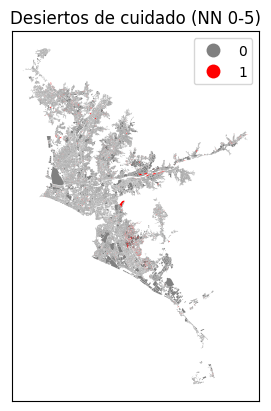

In [65]:
import matplotlib
#geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
manzanas_merged_2.plot(column='desierto_0a5', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (NN 0-5)')

# Save the figure with high resolution
plt.savefig('../figs/desiertos_de_cuidado_0a5.png', format='png', dpi=1500)

plt.show()

In [67]:
manzanas_merged_2.columns

Index(['geometry', 'distancia_a_centro_05', 'duracion_a_centro_05',
       'alta_demanda', 'desierto_0a5', 'Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A'],
      dtype='object')

In [68]:
manzanas_merged_2 = manzanas_merged_2[['Mz', 'UBIGEO', 'AREA', 'CODCCPP',
       'ZONA', 'MANZANA_ID', 'MANZANA_A', 'geometry', 'distancia_a_centro_05', 'duracion_a_centro_05',
       'alta_demanda', 'desierto_0a5']]

In [72]:
manzanas_merged_2.to_csv("../results - desiertos/desiertos_0a5.csv", index=False, sep=";", decimal=",")